In [29]:
import pandas as pd

In [30]:
train = pd.read_csv('./examples/train.csv')
test = pd.read_csv('./examples/test.csv')

In [31]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [32]:

titanic = train.loc[:,['Survived','Pclass','Sex','Age']] #원하는 열 뽑아오기
titanic['isFemale'] = [0 if titanic['Sex'][i]=='male' else 1 for i in range(891)]

In [36]:
titanic = titanic.fillna(titanic['Age'].median()) # 나이가 Nan이면 평균값으로 주기

In [40]:

train['isFemale'] = [0 if titanic['Sex'][i]=='male' else 1 for i in range(891)]

In [41]:
titanic.isnull().sum() # null값이 있는지 체크

Survived    0
Pclass      0
Sex         0
Age         0
isFemale    0
dtype: int64

In [42]:
titanic

,Survived,Pclass,Sex,Age,isFemale
0,0,3,male,22.0,0
1,1,1,female,38.0,1
2,1,3,female,26.0,1
3,1,1,female,35.0,1
4,0,3,male,35.0,0
...,...,...,...,...,...
886,0,2,male,27.0,0
887,1,1,female,19.0,1
888,0,3,female,28.0,1
889,1,1,male,26.0,0


In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   isFemale  891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [44]:
titanic['Survived'].sum()

342

In [45]:
titanic['isFemale'].sum()

314

In [46]:
titanic = titanic.sort_values(["isFemale", "Survived"], ascending=False)
titanic

,Survived,Pclass,Sex,Age,isFemale
1,1,1,female,38.0,1
2,1,3,female,26.0,1
3,1,1,female,35.0,1
8,1,3,female,27.0,1
9,1,2,female,14.0,1
...,...,...,...,...,...
881,0,3,male,33.0,0
883,0,2,male,28.0,0
884,0,3,male,25.0,0
886,0,2,male,27.0,0


In [112]:
titanic['isFemale'][313:315]

888    1
17     0
Name: isFemale, dtype: int64

In [113]:
titanic[:314]['Survived'].mean() # 여성 생존률 

0.7420382165605095

In [142]:
titanic[314:]['Survived'].mean() #남성 생존률

0.38648180242634317

In [47]:
titanic = titanic.sort_values(["isFemale", "Survived"], ascending=True)
titanic

,Survived,Pclass,Sex,Age,isFemale
0,0,3,male,22.0,0
4,0,3,male,35.0,0
5,0,3,male,28.0,0
6,0,1,male,54.0,0
7,0,3,male,2.0,0
...,...,...,...,...,...
874,1,2,female,28.0,1
875,1,3,female,15.0,1
879,1,1,female,56.0,1
880,1,2,female,25.0,1


In [48]:
titanic = titanic.sort_values(["Pclass","Survived"], ascending=False)
(titanic['Pclass']==3).sum()

491

In [49]:
titanic[0:492] # idx = 491 부터 pclass = 2

,Survived,Pclass,Sex,Age,isFemale
36,1,3,male,28.0,0
65,1,3,male,28.0,0
74,1,3,male,32.0,0
81,1,3,male,29.0,0
107,1,3,male,28.0,0
...,...,...,...,...,...
863,0,3,female,28.0,1
882,0,3,female,22.0,1
885,0,3,female,39.0,1
888,0,3,female,28.0,1


In [51]:
titanic[:491]['Survived'].mean() #3등석 생존률

0.24236252545824846

In [52]:
(titanic['Pclass']==2).sum()

184

In [53]:
titanic[491:491+184]['Survived'].mean() # 2등석 생존률

0.47282608695652173

In [54]:
#titanic[670:680] # idx = 675부터 1등석

In [55]:
titanic[675:]['Survived'].mean() # 1등석 생존률

0.6296296296296297

In [56]:
titanic[titanic['Pclass'] == 3]['Survived'].mean() #1등석 생존률 

0.24236252545824846

# Column-Wise and Multiple Function Application

In [4]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [7]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [6]:
grouped = tips.groupby(['day','smoker'])

In [8]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [10]:
def peak_to_peak(arr):
    return arr.max() - arr.min() # range반환
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [13]:
import numpy as np
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [18]:
grouped = tips.groupby(['size'])

In [19]:
grouped_pct = grouped['tip_pct']

In [24]:
grouped_pct.agg(['mean','std',])

,mean,std
size,,
1,0.217292,0.080342
2,0.165719,0.066848
3,0.152157,0.045459
4,0.145949,0.042395
5,0.141495,0.067733
6,0.156229,0.042153


In [26]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

<ipython-input-26-94f2b21cf8d2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['tip_pct', 'total_bill'].agg(functions)


tip_pct                     total_bill                  
       count      mean       max      count       mean    max
size                                                         
1          4  0.217292  0.325733          4   7.242500  10.07
2        156  0.165719  0.710345        156  16.448013  40.55
3         38  0.152157  0.230742         38  23.277632  50.81
4         37  0.145949  0.280535         37  28.613514  48.33
5          5  0.141495  0.241663          5  30.068000  41.19
6          4  0.156229  0.195335          4  34.830000  48.17

In [27]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


# Titanic Data 
again

In [84]:
train = pd.read_csv('./examples/train.csv')
titanic = train.loc[:,['Survived','Pclass','Sex','Age']] #원하는 열 뽑아오기

In [85]:
grouped = titanic.groupby(['Pclass'])

In [86]:
grouped.mean()

,Survived,Age
Pclass,,
1,0.629630,38.233441
2,0.472826,29.877630
3,0.242363,25.140620


In [87]:
grouped = titanic.groupby(['Age'])
grouped.mean()


,Survived,Pclass
Age,,
0.42,1.0,3.0
0.67,1.0,2.0
0.75,1.0,3.0
0.83,1.0,2.0
0.92,1.0,1.0
...,...,...
70.00,0.0,1.5
70.50,0.0,3.0
71.00,0.0,1.0


In [88]:
bins = [0,10,20,30,40,50,60,70,80,90]
titanic['Age'] = titanic['Age'].fillna(90) #na는 90으로 지정 (80세 이상은 아무도 없어서)
titanic['age_interval'] = pd.cut(titanic['Age'], bins) #나이대 별로 나누기
titanic

,Survived,Pclass,Sex,Age,age_interval
0,0,3,male,22.0,"(20, 30]"
1,1,1,female,38.0,"(30, 40]"
2,1,3,female,26.0,"(20, 30]"
3,1,1,female,35.0,"(30, 40]"
4,0,3,male,35.0,"(30, 40]"
...,...,...,...,...,...
886,0,2,male,27.0,"(20, 30]"
887,1,1,female,19.0,"(10, 20]"
888,0,3,female,90.0,"(80, 90]"
889,1,1,male,26.0,"(20, 30]"


In [92]:
grouped = titanic.groupby(['age_interval'])
grouped.mean() #나이대별 생존률

,Survived,Pclass,Age
age_interval,,,
"(0, 10]",0.593750,2.640625,4.268281
"(10, 20]",0.382609,2.530435,17.317391
"(20, 30]",0.365217,2.386957,25.423913
"(30, 40]",0.445161,2.090323,35.051613
"(40, 50]",0.383721,1.918605,45.372093
"(50, 60]",0.404762,1.523810,54.892857
"(60, 70]",0.235294,1.529412,63.882353
"(70, 80]",0.200000,1.800000,73.300000
"(80, 90]",0.293785,2.598870,90.000000


# 피마 인디언 당뇨병 데이터 분석

In [97]:
df = pd.read_csv('./examples/pima-indians-diabetes.csv', names=['pregnant','plasma','pressure','thickness','insulin','BMI','pedigree','age','class'])

In [98]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
grouped = df.groupby(df.dtypes, axis=1)
for dtype, group in grouped:
    print(dtype)
    print(group)

int64
     pregnant  plasma  pressure  thickness  insulin  age  class
0           6     148        72         35        0   50      1
1           1      85        66         29        0   31      0
2           8     183        64          0        0   32      1
3           1      89        66         23       94   21      0
4           0     137        40         35      168   33      1
..        ...     ...       ...        ...      ...  ...    ...
763        10     101        76         48      180   63      0
764         2     122        70         27        0   27      0
765         5     121        72         23      112   30      0
766         1     126        60          0        0   47      1
767         1      93        70         31        0   23      0

[768 rows x 7 columns]
float64
      BMI  pedigree
0    33.6     0.627
1    26.6     0.351
2    23.3     0.672
3    28.1     0.167
4    43.1     2.288
..    ...       ...
763  32.9     0.171
764  36.8     0.340
765  26.2     

In [103]:
grouped = df.groupby(['pregnant'])['class']
grouped.mean()

pregnant
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: class, dtype: float64

In [111]:
bins = [20,30,40,50,60,70,80,90]
df['age_interval'] = pd.cut(df['age'], bins) #나이대 별로 나누기
grouped = df.groupby(['age_interval'])['pregnant']
# df.age.max()
grouped.mean().sort_values(ascending=False)


age_interval
(80, 90]    9.000000
(40, 50]    7.123894
(50, 60]    6.518519
(30, 40]    5.273885
(60, 70]    4.800000
(20, 30]    2.007194
(70, 80]    2.000000
Name: pregnant, dtype: float64

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))

In [117]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

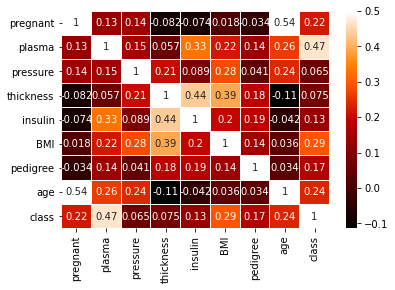

In [131]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True) #seaborn lib를 통해 히트맵


<function matplotlib.pyplot.show(close=None, block=None)>

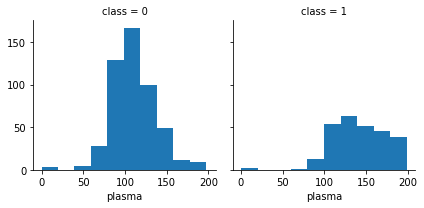

In [129]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [144]:
unames =['user_id','gender','age', 'occupation','zip']
users = pd.read_table('examples/users.dat', sep='::', header=None, names=unames, encoding ='ISO-8859-1')
mnames =['movie_id','title','genres']
movies = pd.read_table('examples/movies.dat', sep='::',header=None,names=mnames, encoding ='ISO-8859-1')
rnames =['user_id','movie_id','rating','timesteps']
ratings = pd.read_table('examples/ratings.dat', sep='::',header=None,names=rnames, encoding ='ISO-8859-1')
movies

C:\Users\korea\anaconda3\envs\da\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [152]:
users[:]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [151]:
movies[:]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [160]:
ratings

,user_id,movie_id,rating,timesteps
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [171]:
result = pd.merge(users, ratings, on='user_id')
result = pd.merge(result, movies, on='movie_id')
result

,user_id,gender,age,occupation,zip,movie_id,rating,timesteps,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [175]:
grouped = result.groupby(['title'])['rating'] #영화의 평균평점
grouped.mean()

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [172]:
mean_ratings = result.pivot_table('rating',index='title',columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [179]:
ratings_by_title = result.groupby('title').size()
ratings_by_title[300:320]

title
Batman & Robin (1997)                                       606
Batman (1989)                                              1431
Batman Forever (1995)                                       777
Batman Returns (1992)                                      1031
Batman: Mask of the Phantasm (1993)                         232
Bats (1999)                                                  67
Battle for the Planet of the Apes (1973)                    312
Battle of the Sexes, The (1959)                               4
Battlefield Earth (2000)                                    342
Battleship Potemkin, The (Bronenosets Potyomkin) (1925)     234
Battling Butler (1926)                                       10
Bay of Blood (Reazione a catena) (1971)                       3
Beach Party (1963)                                           47
Beach, The (2000)                                           423
Bean (1997)                                                 200
Beans of Egypt, Maine, The (1994) 

In [180]:
active_titles=ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [182]:
mean_ratings=mean_ratings.loc[active_titles] #리뷰수가 250개 이상인 영화 데이터만 가져온다
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [184]:
top_female_ratings= mean_ratings.sort_values(by='F',ascending=False)
top_female_ratings #여성에게 인기가 많은 영화수

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


In [187]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff') #남녀의 호불호가 다른 영화 순위
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561
